In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,average_salary,company_text,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):  ## Job title 
    if 'data scientist' in title.lower():
        return 'data scienctist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):  ## seniority
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    
    

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scienctist    279
na                 184
data engineer      119
analyst            102
manager             22
mle                 22
director            14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)

In [9]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
# Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [11]:
#Competitor Count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [12]:
#Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1 )
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis =1 )
df[df.hourly ==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [13]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [14]:
#Removes the new line in the company name
df['company_text'] = df.company_text.apply(lambda x: x.replace('\n',''))
df['company_text']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_text, Length: 742, dtype: object

In [15]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,average_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [16]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

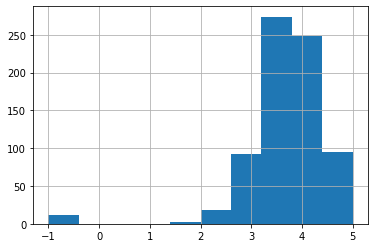

In [17]:
df.Rating.hist()

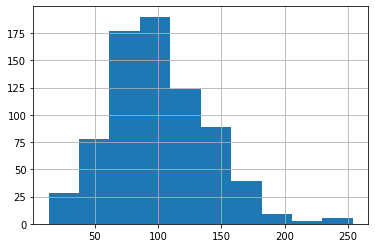

In [18]:
df.average_salary.hist()

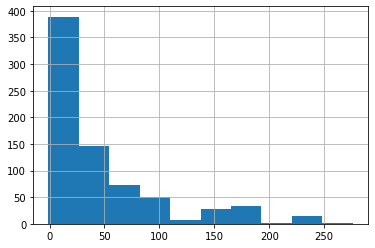

In [19]:
df.age.hist()

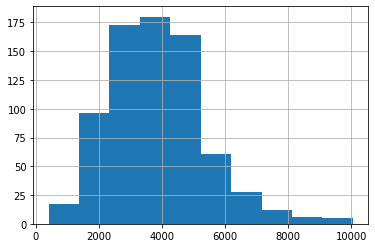

In [20]:
df.desc_len.hist()

In [21]:
df.average_salary.boxplot()

AttributeError: 'Series' object has no attribute 'boxplot'

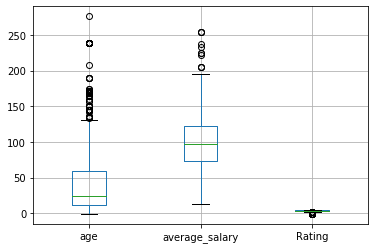

In [22]:
df.boxplot(column = ['age','average_salary','Rating'])

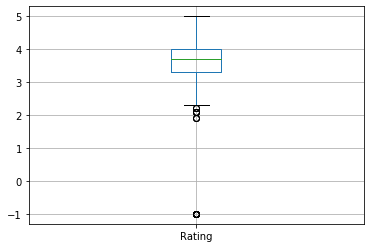

In [23]:
df.boxplot(column = ['Rating'])

In [24]:
df[['age','average_salary','Rating','desc_len']].corr()

,age,average_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
average_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


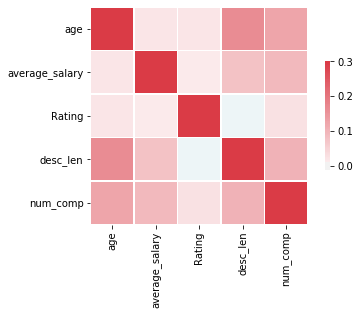

In [25]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['age','average_salary','Rating','desc_len','num_comp']].corr(), vmax=.3, center=0,cmap = cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [27]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_text', 'job_state', 'same_state','python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 200


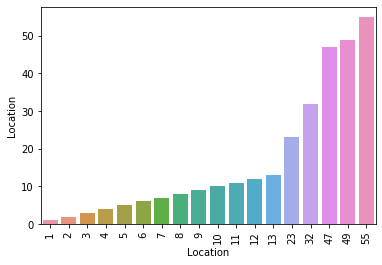

graph for Headquarters: total = 198


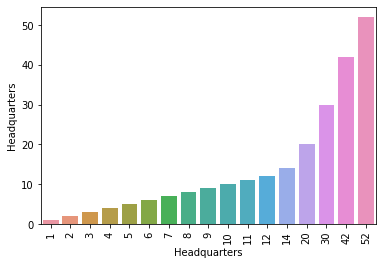

graph for Size: total = 9


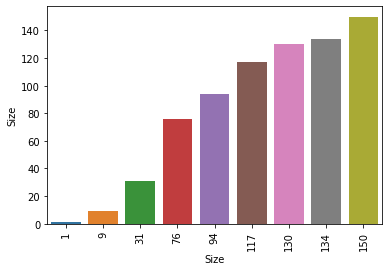

graph for Type of ownership: total = 11


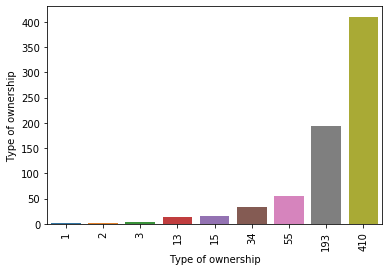

graph for Industry: total = 60


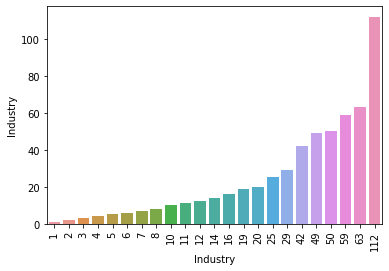

graph for Sector: total = 25


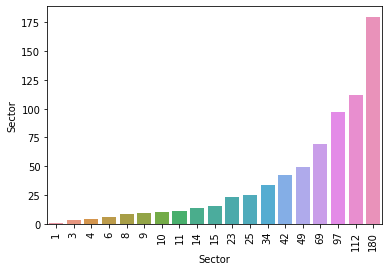

graph for Revenue: total = 14


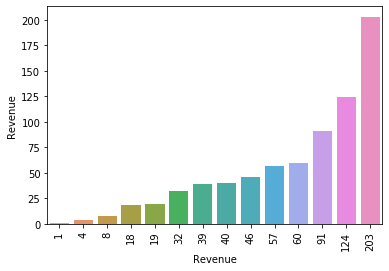

graph for company_text: total = 343


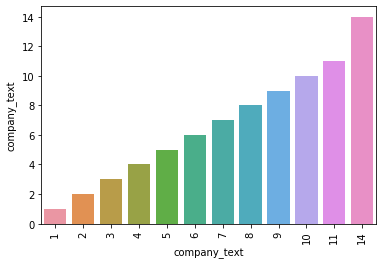

graph for job_state: total = 38


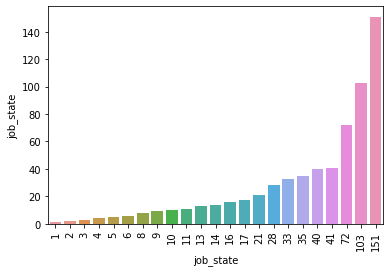

graph for same_state: total = 2


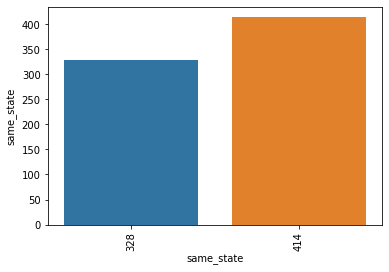

graph for python_yn: total = 2


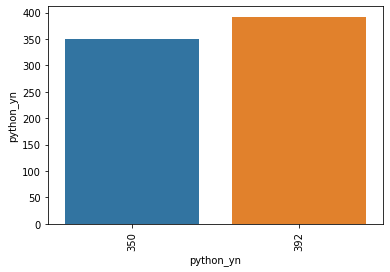

graph for R_yn: total = 2


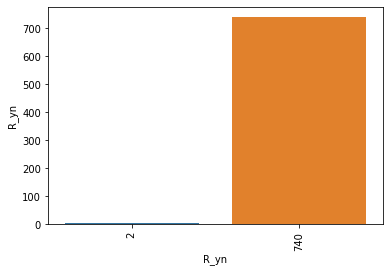

graph for spark: total = 2


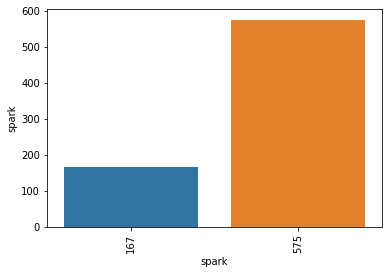

graph for aws: total = 2


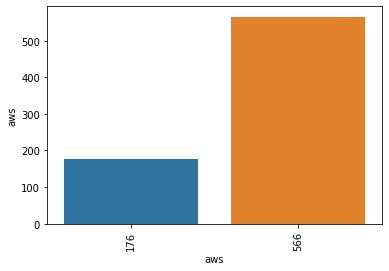

graph for excel: total = 2


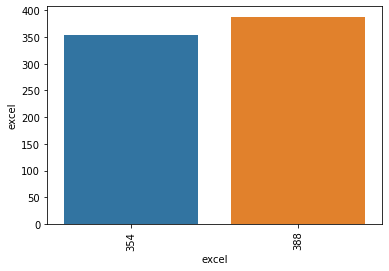

graph for job_simp: total = 7


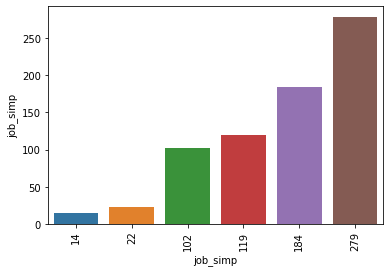

graph for seniority: total = 3


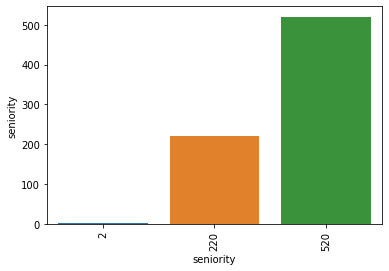

In [28]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


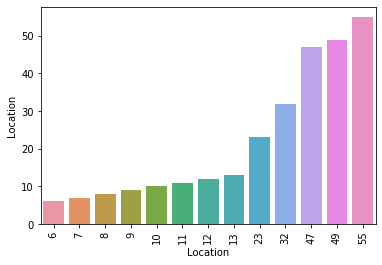

graph for Headquarters: total = 20


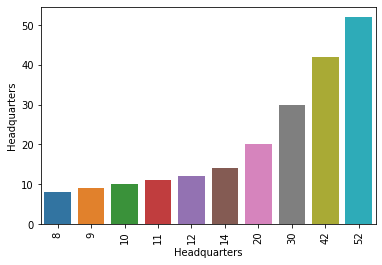

graph for company_text: total = 20


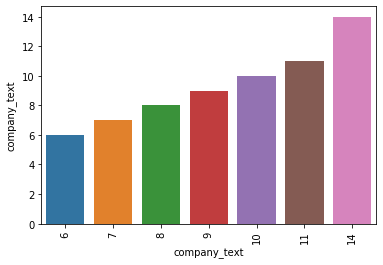

In [29]:
for i in df_cat[['Location','Headquarters','company_text']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [30]:
pd.pivot_table(df, index = 'job_simp', values = 'average_salary')

,average_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scienctist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [31]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'average_salary')

average_salary
job_simp        seniority                
analyst         jr              56.500000
                na              61.155405
                senior          79.092593
data engineer   na              96.701220
                senior         124.689189
data scienctist jr             106.500000
                na             107.043011
                senior         138.956522
director        na             168.607143
manager         na              84.022727
mle             na             119.133333
                senior         142.071429
na              na              73.988189
                senior         109.061404

In [32]:
pd.pivot_table(df, index = 'job_state', values = 'average_salary').sort_values('average_salary',ascending = False)

,average_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
Los Angeles,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


In [33]:

pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average_salary', aggfunc = 'count').sort_values('job_state',ascending = False)

average_salary
job_state job_simp                       
 WI       na                            4
          data scienctist               3
          analyst                       3
 WA       na                            1
          data scienctist              17
...                                   ...
 AZ       analyst                       1
          na                            2
 AL       na                            2
          data engineer                 1
          analyst                       5

[115 rows x 1 columns]

In [34]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'average_salary', 'company_text', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [35]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership


In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided','average_salary', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',  'Type of ownership'
]]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'average_salary').sort_values('average_salary', ascending = False))

Rating
        average_salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average_salary' not 1-dimensional

In [38]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'average_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [39]:
df.to_csv('eda_data.csv', index = False)
df


,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scienctist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scienctist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scienctist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scienctist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scienctist,na,2728,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,...,190,0,0,0,1,0,na,senior,6162,3
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,...,14,1,0,1,1,0,data engineer,senior,6130,3
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,...,36,0,0,0,0,1,na,na,3078,0
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,...,-1,0,0,0,0,1,manager,na,1642,0
